In [1]:
#For N circles to be placed inside a unit circle, what is the largest radius all N circles can have?
#max R
#such that:
#         for all i,j: (xi - xj)^2 + (yi - yj)^2 >= (R + R)^2
#         for all i:   (xi - 1)^2 + (y1 - 1)^2 <= (1 - R)^2

In [2]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
model   = AbstractModel()
model.N = Param(mutable=True, initialize=30)
model.i = RangeSet(model.N)
model.j = Set(initialize=model.i)
model.R = Var(bounds=(0.001,2), within=NonNegativeReals, initialize=random.uniform(0.001,1))
model.x = Var(model.i, bounds=(0.001,2), within=NonNegativeReals, initialize=random.uniform(0.001,2))
model.y = Var(model.i, bounds=(0.001,2), within=NonNegativeReals, initialize=random.uniform(0.001,2))
def rule_eq1(model,i,j):
    if i>j:
        return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >=4*model.R**2
    else:
        return Constraint.Skip;
model.eq1 = Constraint(model.i,model.j,rule=rule_eq1)

def rule_eq2(model,i):
    return (model.x[i]-1)**2+(model.y[i]-1)**2 <=(1-model.R)**2
model.eq2 = Constraint(model.i,rule=rule_eq2)

model.obj = Objective(expr=model.R, sense=maximize)
opt = SolverFactory('ipopt')

In [4]:
instance = model.create_instance()
results = opt.solve(instance) #solves and updates instance

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)


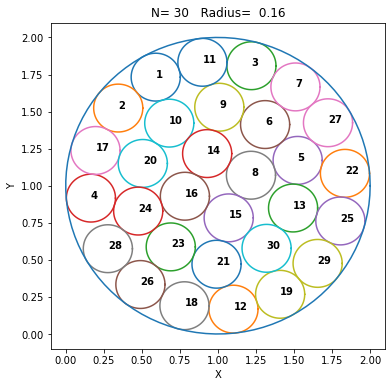

In [5]:
fig = plt.figure(figsize=(6,6))
theta=np.linspace(0,2*np.pi,100)
for i in instance.i:
    Xc=value(instance.x[i])+value(instance.R)*np.cos(theta)
    Yc=value(instance.y[i])+value(instance.R)*np.sin(theta)
    plt.text(value(instance.x[i]),value(instance.y[i]),str(i),fontweight='bold')
    plt.plot(Xc,Yc)

Xc=1+np.cos(theta)
Yc=1+np.sin(theta)
plt.plot(Xc,Yc)
plt.title('N= '+ str(value(instance.N)) +'   Radius= ' + str("%5.2f"% value(instance.R)))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()